# Assignment 2 - Pandas

syed ,Muhammad Haider Shah, 21032264

## The Story

Use Markdown cells to write a brief summary of the data analysis you are planning to undertake:

  - What is the goal of this work?
    
  - What kind of data is analyzed in this work? 
    
  - What summary statistics are obtained in this work?

  
This part is worth 3 marks. I recommend writing this part once you have completed all the remaining parts of this assignment.

### Goal:
The Goal of of this work was to get some hidden insights from the data extracted from the world bank by looking at the different patterns 
### Data Analysis
The appraoch of my analysis was exploratary i.e. i tried to do exploratary data analysis 
### Stistics
The statistics i used in this assignmnet was mean, min , max median , sum in order to reach the desired goals and to get the maximum information from the data i have selected and the one that was presented with this assignment.


## Importing liabraries

In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import wbgapi as wb
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In this part you need to construct two Pandas DataFrames using [World Bank Data API](https://pypi.org/project/wbgapi/). To install this API, run ``pip install wbgapi`` in the command line.


This part is worth 12 marks overall. A detailed breakdown of the marks if given below.

### Countries

Choose 10 or more countries and split them into at least three different groups. For instance:

  - Continents: Europe, Asia, Africa, ...
    
  - Economic development: high, medium, low.
    
  - Population size: large, medium, small.
    
  - Area size: large, medium, small.
    
  - Any other splitting.
  
Then create three variables:

  - ``country_codes`` - a list of the country codes of the chosen countries. Use this [link](https://wits.worldbank.org/wits/wits/witshelp/content/codes/country_codes.htm) to find the country codes, e.g. ``'GBR'``.
  
  - ``country_names`` - a dictionary with keys being country codes and values being country names, e.g. ``'GBR':'United Kingdom'``.
  
  - ``country_groups`` - a dictionary with keys being country codes and values being country groups, e.g. ``'GBR':'Europe'``.
  
This part is worth 2 marks: 1 mark for Python code and 1 mark for comments and explanations.

In [3]:
# write your code here
df1 = pd.read_csv("Metadata_Country_API_19_DS2_en_csv_v2_3931355.csv")
df2 = pd.read_csv("Metadata_Indicator_API_19_DS2_en_csv_v2_3931355.csv")
df1.head()
# df2.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [4]:
#Looking at the Overview 
df1.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  123 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


In [5]:
#Looking at the nan values
df1.isnull().sum()

Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    142
TableName         0
Unnamed: 5      265
dtype: int64

In [6]:
#removing the Unnamed5 column
df1.drop('Unnamed: 5',axis=1,inplace=True)

In [7]:
df1.head(2)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern


In [8]:
#looking at the value counts for each column
for col in df1.columns:
    print(df1[col].value_counts())
    print(f"-----------------------------")

ESP    1
NAM    1
SMR    1
NIC    1
LVA    1
      ..
SWE    1
TEA    1
SLB    1
ISR    1
GUM    1
Name: Country Code, Length: 265, dtype: int64
-----------------------------
Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64
-----------------------------
High income            79
Upper middle income    55
Lower middle income    55
Low income             27
Name: IncomeGroup, dtype: int64
-----------------------------
Fiscal year end: March 31; reporting period for national accounts data: CY.                                                                                                                                                                                                                                                                                         7
The reporting

In [9]:
#dropping the rows conatianing nan values
df1.dropna(how='any',inplace=True)
#resetting the indexes
df1.reset_index(drop=True,inplace=True)

In [10]:
# looking for duplicates in country code
df1['Country Code'].duplicated(keep=False).any()

False

In [11]:
#selecting 20 countries
tt = df1['Country Code'].sample(n=10)
tt = list(tt.values)

In [12]:
#Selecting Twenty countries in the for of data frame
twenty_countries_df = df1[[c in tt for c in df1['Country Code']]]
twenty_countries_df.reset_index(drop=True,inplace=True)
twenty_countries_df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,BGD,South Asia,Lower middle income,The reporting period for national accounts dat...,Bangladesh
1,IDN,East Asia & Pacific,Lower middle income,Fiscal year end: March 31; reporting period fo...,Indonesia
2,KEN,Sub-Saharan Africa,Lower middle income,Fiscal year end: June 30; reporting period for...,Kenya
3,LAO,East Asia & Pacific,Lower middle income,The World Bank systematically assesses the app...,Lao PDR
4,MNE,Europe & Central Asia,Upper middle income,Montenegro declared independence from Serbia a...,Montenegro


### Grouping Based on Region

In [13]:
#Grouping them based on region
grpby_region = twenty_countries_df.groupby('Region')
#looking at the Europe & Central Asia Group
grpby_region.get_group('Europe & Central Asia')

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
4,MNE,Europe & Central Asia,Upper middle income,Montenegro declared independence from Serbia a...,Montenegro
8,SWE,Europe & Central Asia,High income,Fiscal year end: June 30; reporting period for...,Sweden


### Grouping Based on Income Group

In [14]:
#Grouping them based on income
grpby_income = twenty_countries_df.groupby('IncomeGroup')
#looking at the High income Group
grpby_income.get_group('High income')

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
8,SWE,Europe & Central Asia,High income,Fiscal year end: June 30; reporting period for...,Sweden


### Grouping Based on Income TableNmae

In [16]:
#Grouping them based on TableName
grpby_tableName = twenty_countries_df.groupby('TableName')
#looking at the High income Group
grpby_tableName.get_group('Sweden')

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
8,SWE,Europe & Central Asia,High income,Fiscal year end: June 30; reporting period for...,Sweden


In [17]:
#list of choosen country Codes
country_codes = tt
country_codes

['PER', 'TON', 'KEN', 'SWE', 'SUR', 'MNE', 'BGD', 'LAO', 'MRT', 'IDN']

In [18]:
#country_names - a dictionary with keys being country codes and values being country names, e.g. 'GBR':'United Kingdom'.
country_names = {}
for key in tt:
    val = re.findall('[a-zA-z]\w+\n',str(df1[df1["Country Code"]==key]['TableName']))
    val = str(val[0])
    val = val.replace('\n','') 
    country_names[key] = val
country_names    

{'PER': 'Peru',
 'TON': 'Tonga',
 'KEN': 'Kenya',
 'SWE': 'Sweden',
 'SUR': 'Suriname',
 'MNE': 'Montenegro',
 'BGD': 'Bangladesh',
 'LAO': 'PDR',
 'MRT': 'Mauritania',
 'IDN': 'Indonesia'}

In [19]:
#country_groups - a dictionary with keys being country codes and values being country groups, e.g. 'GBR':'Europe'.
country_groups = {}
for key in tt:
    val = df1[df1["Country Code"]==key]['Region'].values[0]
    country_groups[key] = val
country_groups    


{'PER': 'Latin America & Caribbean',
 'TON': 'East Asia & Pacific',
 'KEN': 'Sub-Saharan Africa',
 'SWE': 'Europe & Central Asia',
 'SUR': 'Latin America & Caribbean',
 'MNE': 'Europe & Central Asia',
 'BGD': 'South Asia',
 'LAO': 'East Asia & Pacific',
 'MRT': 'Sub-Saharan Africa',
 'IDN': 'East Asia & Pacific'}

### Indicators

Explore [The World Bank Data](https://data.worldbank.org/indicator) website and choose two categories of indicators, for instance:

  - Economy and Education
  - Health and Poverty

Choose four or more indicators from each category (eight or more in total). At least two of them should be multi-level indicators. For instance:

  - Gross domestic product (GDP): 
    
      - total, in billions usd
      
      - total, in billions usd adjusted to purchasing power parity (PPP) 
      

  - Population:
  
      - male
      
      - female
      
      - total

  
You can choose indicators from different World Bank data categories, if that suits your story.      
      
You will need indicator IDs to access the data via the World Bank API. There are two ways to find the IDs:

  - Find the wanted indicator on the World Bank website and read its ID from the web address. For instance, the "Population, total", indicator web address is:
  
    ```
    https://data.worldbank.org/indicator/SP.POP.TOTL
    ```
    The indicator ID is thus: ``SP.POP.TOTL``
    

  - Use ``wb.search()`` method to find the wanted indicator ID. For instance:

    ````python
    import wbgapi as wb
    wb.search("population, total")
    ````
      
  - Use ``wb.series.info()`` method to find the indicator name from its ID. For instance:
  
    ````python
    import wbgapi as wb
    wb.series.info("SP.POP.TOTL")
    ````  

Collect indicator IDs to two lists, say ``indicator_ids_1`` and ``indicator_ids_2``, one for each category.
      
**Important:** Choose indicators wisely to be able to tell a story. You will need to summarize these indicators in the next section on this assignment. 

This part is worth 3 marks: 2 marks for Python code and 1 mark for comments and explanations of the indicators.

In [20]:
country_codes = tt

## Category = Climate Change 

In [21]:
# write your code here
access_to_electricity = 'EG.ELC.ACCS.ZS'
agr_land = 'AG.LND.AGRI.ZS'
co2_emiision_mtpc = 'EN.ATM.CO2E.PC'
urban_pop = 'SP.URB.TOTL'
fresh_water_witdrawl = 'ER.H2O.FWTL.K3'
forest_area = 'AG.LND.FRST.ZS'

In [22]:
indicators1 = ['EG.ELC.ACCS.ZS','AG.LND.AGRI.ZS','EN.ATM.CO2E.PC','SP.URB.TOTL','ER.H2O.FWTL.K3','AG.LND.FRST.ZS']

In [23]:
# most recent years
df_climate =  wb.data.DataFrame(indicators1, country_codes, mrv=5)

In [24]:
df_climate.head(12)

YR2016        YR2017        YR2018  \
economy series                                                     
BGD     AG.LND.AGRI.ZS  7.063233e+01  7.057947e+01  7.069448e+01   
        AG.LND.FRST.ZS  1.446877e+01  1.446877e+01  1.446877e+01   
        EG.ELC.ACCS.ZS  7.592000e+01  8.800000e+01  9.180000e+01   
        EN.ATM.CO2E.PC  4.667764e-01  4.929066e-01  5.128373e-01   
        ER.H2O.FWTL.K3           NaN  3.587000e+01           NaN   
        SP.URB.TOTL     5.542312e+07  5.726000e+07  5.911552e+07   
IDN     AG.LND.AGRI.ZS  3.206359e+01  3.318209e+01  3.318209e+01   
        AG.LND.FRST.ZS  5.074345e+01  5.003933e+01  4.971682e+01   
        EG.ELC.ACCS.ZS  9.762000e+01  9.814000e+01  9.851000e+01   
        EN.ATM.CO2E.PC  1.892441e+00  2.013671e+00  2.178462e+00   
        ER.H2O.FWTL.K3           NaN  2.226350e+02           NaN   
        SP.URB.TOTL     1.412117e+08  1.446556e+08  1.480887e+08   

                              YR2019        YR2020  
economy series                                      
BGD     AG.LND.AGRI.ZS           NaN           NaN  
        AG.LND.FRST.ZS  1.446877e+01  1.446877e+01  
        EG.ELC.ACCS.ZS  9.220000e+01           NaN  
        EN.ATM.CO2E.PC           NaN           NaN  
        ER.H2O.FWTL.K3           NaN           NaN  
        SP.URB.TOTL     6.098742e+07  6.287347e+07  
IDN     AG.LND.AGRI.ZS           NaN           NaN  
        AG.LND.FRST.ZS  4.939430e+01  4.907178e+01  
        EG.ELC.ACCS.ZS  9.885000e+01           NaN  
        EN.ATM.CO2E.PC           NaN           NaN  
        ER.H2O.FWTL.K3           NaN           NaN  
        SP.URB.TOTL     1.515097e+08  1.549265e+08

In [25]:
df_climate = df_climate.unstack(level=1)
df_climate = df_climate.unstack(level=0)
df_climate = pd.DataFrame(df_climate)
df_climate.head()

0
       series         economy           
YR2016 AG.LND.AGRI.ZS BGD      70.632327
                      IDN      32.063590
                      KEN      48.546930
                      LAO      10.805893
                      MNE      19.011152

In [26]:
df_climate = df_climate.unstack(level=1)
df_climate.head()

0                                               \
series         AG.LND.AGRI.ZS AG.LND.FRST.ZS EG.ELC.ACCS.ZS EN.ATM.CO2E.PC   
       economy                                                               
YR2016 BGD          70.632327      14.468772      75.920000       0.466776   
       IDN          32.063590      50.743455      97.620000       1.892441   
       KEN          48.546930       6.240942      53.100000       0.382659   
       LAO          10.805893      72.502166      90.772537       2.243696   
       MNE          19.011152      61.486989     100.000000       3.390631   

                                            
series         ER.H2O.FWTL.K3  SP.URB.TOTL  
       economy                              
YR2016 BGD                NaN   55423124.0  
       IDN                NaN  141211677.0  
       KEN                NaN   12804902.0  
       LAO                NaN    2309515.0  
       MNE                NaN     411597.0

In [27]:
# Droping the multilevel column
df_climate.columns = df_climate.columns.droplevel()
df_climate.head()

series          AG.LND.AGRI.ZS  AG.LND.FRST.ZS  EG.ELC.ACCS.ZS  \
       economy                                                   
YR2016 BGD           70.632327       14.468772       75.920000   
       IDN           32.063590       50.743455       97.620000   
       KEN           48.546930        6.240942       53.100000   
       LAO           10.805893       72.502166       90.772537   
       MNE           19.011152       61.486989      100.000000   

series          EN.ATM.CO2E.PC  ER.H2O.FWTL.K3  SP.URB.TOTL  
       economy                                               
YR2016 BGD            0.466776             NaN   55423124.0  
       IDN            1.892441             NaN  141211677.0  
       KEN            0.382659             NaN   12804902.0  
       LAO            2.243696             NaN    2309515.0  
       MNE            3.390631             NaN     411597.0

## Category = Gender

In [28]:
Literacy_rate_youth_male_ages_15_24 = 'SE.ADT.1524.LT.MA.ZS'
Literacy_rate_youth_female_ages_15_24 = 'SE.ADT.1524.LT.FE.ZS'
Employment_in_services_male = 'SL.SRV.EMPL.MA.ZS'
Employment_in_services_female = 'SL.SRV.EMPL.FE.ZS' 
Wage_salaried_workers_male = 'SL.EMP.WORK.MA.ZS'
Wage_salaried_workers_female = 'SL.EMP.WORK.FE.ZS'


In [29]:
indicators2 = ['SE.ADT.1524.LT.MA.ZS','SE.ADT.1524.LT.FE.ZS','SL.SRV.EMPL.MA.ZS','SL.SRV.EMPL.FE.ZS','SL.EMP.WORK.MA.ZS','SL.EMP.WORK.FE.ZS']

In [30]:
# most recent years
df_gender =  wb.data.DataFrame(indicators2, country_codes, mrv=5)

In [31]:
df_gender.head(12)

YR2016     YR2017     YR2018     YR2019  \
economy series                                                             
BGD     SE.ADT.1524.LT.FE.ZS  93.535316  94.377762  94.912590  96.087761   
        SE.ADT.1524.LT.MA.ZS  90.905350  91.541290  91.803719  93.704697   
        SL.EMP.WORK.FE.ZS     27.980000  31.090000  32.610001  33.990002   
        SL.EMP.WORK.MA.ZS     43.810001  43.000000  43.270000  43.580002   
        SL.SRV.EMPL.FE.ZS     20.660000  23.360001  24.170000  24.770000   
        SL.SRV.EMPL.MA.ZS     43.130001  45.500000  46.330002  46.990002   
IDN     SE.ADT.1524.LT.FE.ZS  99.653511        NaN  99.696251        NaN   
        SE.ADT.1524.LT.MA.ZS  99.683449        NaN  99.717484        NaN   
        SL.EMP.WORK.FE.ZS     41.900002  41.650002  40.869999  41.040001   
        SL.EMP.WORK.MA.ZS     53.240002  53.369999  52.770000  52.950001   
        SL.SRV.EMPL.FE.ZS     53.939999  54.520000  55.500000  56.970001   
        SL.SRV.EMPL.MA.ZS     41.770000  42.529999  43.270000  44.049999   

                                 YR2020  
economy series                           
BGD     SE.ADT.1524.LT.FE.ZS  95.858749  
        SE.ADT.1524.LT.MA.ZS  93.164169  
        SL.EMP.WORK.FE.ZS           NaN  
        SL.EMP.WORK.MA.ZS           NaN  
        SL.SRV.EMPL.FE.ZS           NaN  
        SL.SRV.EMPL.MA.ZS           NaN  
IDN     SE.ADT.1524.LT.FE.ZS  99.781448  
        SE.ADT.1524.LT.MA.ZS  99.777672  
        SL.EMP.WORK.FE.ZS           NaN  
        SL.EMP.WORK.MA.ZS           NaN  
        SL.SRV.EMPL.FE.ZS           NaN  
        SL.SRV.EMPL.MA.ZS           NaN

In [32]:
df_gender = df_gender.unstack(level=1)
df_gender = df_gender.unstack(level=0)
df_gender = pd.DataFrame(df_gender)
df_gender.head()

0
       series               economy           
YR2016 SE.ADT.1524.LT.FE.ZS BGD      93.535316
                            IDN      99.653511
                            KEN            NaN
                            LAO            NaN
                            MNE            NaN

In [33]:
df_gender = df_gender.unstack(level=1)
df_gender.head()

0                                         \
series         SE.ADT.1524.LT.FE.ZS SE.ADT.1524.LT.MA.ZS SL.EMP.WORK.FE.ZS   
       economy                                                               
YR2016 BGD                93.535316            90.905350         27.980000   
       IDN                99.653511            99.683449         41.900002   
       KEN                      NaN                  NaN         39.389999   
       LAO                      NaN                  NaN         15.890000   
       MNE                      NaN                  NaN         84.370003   

                                                                      
series         SL.EMP.WORK.MA.ZS SL.SRV.EMPL.FE.ZS SL.SRV.EMPL.MA.ZS  
       economy                                                        
YR2016 BGD             43.810001         20.660000         43.130001  
       IDN             53.240002         53.939999         41.770000  
       KEN             55.540001         36.320000         38.290001  
       LAO             28.280001         24.600000         23.299999  
       MNE             73.779999         84.800003         66.660004

In [34]:
# Droping the multilevel column
df_gender.columns = df_gender.columns.droplevel()
df_gender.head()

series          SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.MA.ZS  SL.EMP.WORK.FE.ZS  \
       economy                                                                  
YR2016 BGD                 93.535316             90.905350          27.980000   
       IDN                 99.653511             99.683449          41.900002   
       KEN                       NaN                   NaN          39.389999   
       LAO                       NaN                   NaN          15.890000   
       MNE                       NaN                   NaN          84.370003   

series          SL.EMP.WORK.MA.ZS  SL.SRV.EMPL.FE.ZS  SL.SRV.EMPL.MA.ZS  
       economy                                                           
YR2016 BGD              43.810001          20.660000          43.130001  
       IDN              53.240002          53.939999          41.770000  
       KEN              55.540001          36.320000          38.290001  
       LAO              28.280001          24.600000          23.299999  
       MNE              73.779999          84.800003          66.660004

### DataFrames

Use [World Bank Data API](https://pypi.org/project/wbgapi/) to get data for each indicator and each country for the most recent 10-20 years, subject to data availability.

Then create two Pandas DataFrames each having the following structure:

  - MultiIndexed columns consisting of indicators you have chosen above. You should choose short but informative column names to label the indicators.
  
  - MultiIndexed rows consisting of country codes and years. 


The necessary Pandas techniques are explained in Notebooks 2.5, 2.6, and 2.7.


To get the World Bank data use ``wb.data.DataFrame()`` method. For instance:

````python
import wbgapi as wb
indicator_ids = ['NY.GDP.PCAP.CD', 'SP.POP.TOTL']
country_codes = ['FRA','GBR','IRL']
my_dataframe  = wb.data.DataFrame(indicator_ids, country_codes, mrv=5) # most recent 5 years 
````

Here you should use indicators and country codes you have constructed above.


The resulting DataFrames should have structure similar to this one:


<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" halign="left">GDP (bln)</th>
      <th colspan="3" halign="left">Population (mln)</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>Gross</th>
      <th>PPP</th>
      <th>Total</th>
      <th>Female</th>
      <th>Male</th>
    </tr>
    <tr>
      <th>country</th>
      <th>year</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">FRA</th>
      <th>2001</th>
      <td>1376.47</td>
      <td>1686.72</td>
      <td>61.36</td>
      <td>31.61</td>
      <td>29.75</td>
    </tr>
    <tr>
      <th>2002</th>
      <td>1494.29</td>
      <td>1762.93</td>
      <td>61.81</td>
      <td>31.85</td>
      <td>29.95</td>
    </tr>
    <tr>
      <th>2003</th>
      <td>1840.48</td>
      <td>1753.61</td>
      <td>62.24</td>
      <td>32.09</td>
      <td>30.15</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">GBR</th>
      <th>2001</th>
      <td>1643.91</td>
      <td>1643.95</td>
      <td>59.12</td>
      <td>30.29</td>
      <td>28.83</td>
    </tr>
    <tr>
      <th>2002</th>
      <td>1784.08</td>
      <td>1725.43</td>
      <td>59.37</td>
      <td>30.39</td>
      <td>28.98</td>
    </tr>
    <tr>
      <th>2003</th>
      <td>2057.09</td>
      <td>1810.62</td>
      <td>59.65</td>
      <td>30.50</td>
      <td>29.15</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">IRL</th>
      <th>2001</th>
      <td>109.25</td>
      <td>125.91</td>
      <td>3.87</td>
      <td>1.94</td>
      <td>1.92</td>
    </tr>
    <tr>
      <th>2002</th>
      <td>127.99</td>
      <td>138.49</td>
      <td>3.93</td>
      <td>1.97</td>
      <td>1.96</td>
    </tr>
    <tr>
      <th>2003</th>
      <td>164.31</td>
      <td>145.01</td>
      <td>4.00</td>
      <td>2.00</td>
      <td>1.99</td>
    </tr>
  </tbody>
</table>

<br>


This part is worth 7 marks: 3 marks for Python code for each DataFrame and 1 mark for comments explaining the Python code.

#### Most of the Transformation is done on the above cells

In [35]:
df_climate

series          AG.LND.AGRI.ZS  AG.LND.FRST.ZS  EG.ELC.ACCS.ZS  \
       economy                                                   
YR2016 BGD           70.632327       14.468772       75.920000   
       IDN           32.063590       50.743455       97.620000   
       KEN           48.546930        6.240942       53.100000   
       LAO           10.805893       72.502166       90.772537   
       MNE           19.011152       61.486989      100.000000   
       MRT           38.479674        0.324634       41.334164   
       PER           18.505469       57.039281       94.200000   
       SUR            0.557692       97.694359       95.906654   
       SWE            7.442734       68.694606      100.000000   
       TON           48.611111       12.430556       97.020000   
YR2017 BGD           70.579473       14.468772       88.000000   
       IDN           33.182088       50.039334       98.140000   
       KEN           48.546930        6.292880       56.091431   
       LAO           10.589255       72.352686       93.600000   
       MNE           19.055762       61.486989      100.000000   
       MRT           38.479674        0.319395       42.900000   
       PER           18.489844       56.902172       94.800000   
       SUR            0.538462       97.647564       96.728706   
       SWE            7.416955       68.694606      100.000000   
       TON           48.611111       12.430556       98.331017   
YR2018 BGD           70.694476       14.468772       91.800000   
       IDN           33.182088       49.716818       98.510000   
       KEN           48.546930        6.344818       61.436417   
       LAO           10.372617       72.203206       98.074600   
       MNE           19.092937       61.486989      100.000000   
       MRT           38.479674        0.314058       44.293827   
       PER           18.444297       56.778156       95.200000   
       SUR            0.538462       97.569103       97.400000   
       SWE            7.387494       68.694606      100.000000   
       TON           48.611111       12.430556       99.131302   
YR2019 BGD                 NaN       14.468772       92.200000   
       IDN                 NaN       49.394296       98.850000   
       KEN                 NaN        6.344818       69.700000   
       LAO                 NaN       72.053726      100.000000   
       MNE                 NaN       61.486989      100.000000   
       MRT                 NaN        0.308819       45.812069   
       PER                 NaN       56.643125       98.346603   
       SUR                 NaN       97.490577       97.887352   
       SWE                 NaN       68.694606      100.000000   
       TON                 NaN       12.430556       98.400000   
YR2020 BGD                 NaN       14.468772             NaN   
       IDN                 NaN       49.071780             NaN   
       KEN                 NaN        6.344818             NaN   
       LAO                 NaN       71.904246             NaN   
       MNE                 NaN       61.486989             NaN   
       MRT                 NaN        0.303483             NaN   
       PER                 NaN       56.508102             NaN   
       SUR                 NaN       97.412115             NaN   
       SWE                 NaN       68.694606             NaN   
       TON                 NaN       12.430556             NaN   

series          EN.ATM.CO2E.PC  ER.H2O.FWTL.K3  SP.URB.TOTL  
       economy                                               
YR2016 BGD            0.466776             NaN   55423124.0  
       IDN            1.892441             NaN  141211677.0  
       KEN            0.382659             NaN   12804902.0  
       LAO            2.243696             NaN    2309515.0  
       MNE            3.390631             NaN     411597.0  
       MRT            0.674908             NaN    2163454.0  
       PER            1.827910             NaN   23979739.0  
       SU

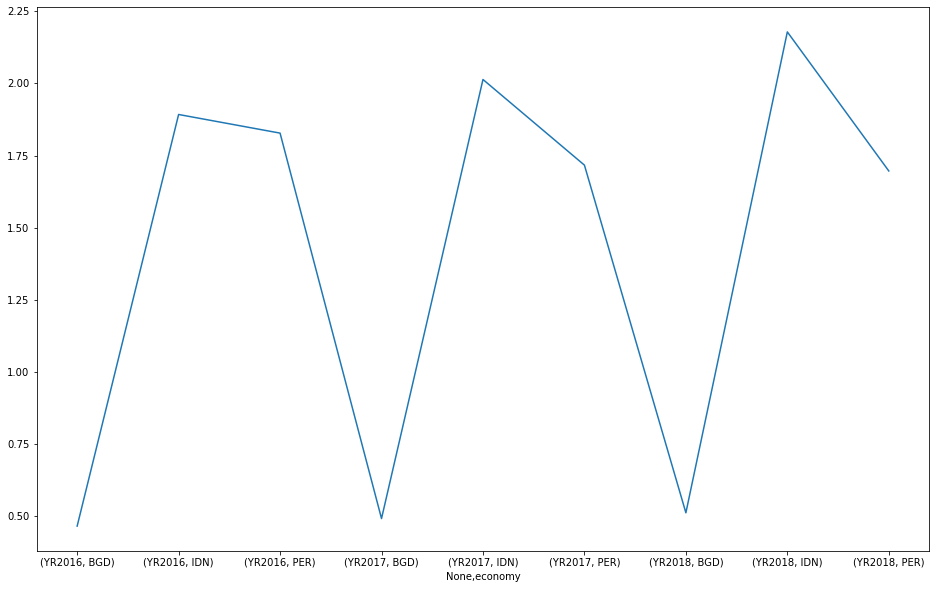

In [36]:
#looking at the carbon emission where urban pop is greater than 20000000
plt.figure(figsize=(16, 10))
df_climate.loc[df_climate["SP.URB.TOTL"] > 20000000]['EN.ATM.CO2E.PC'].plot()

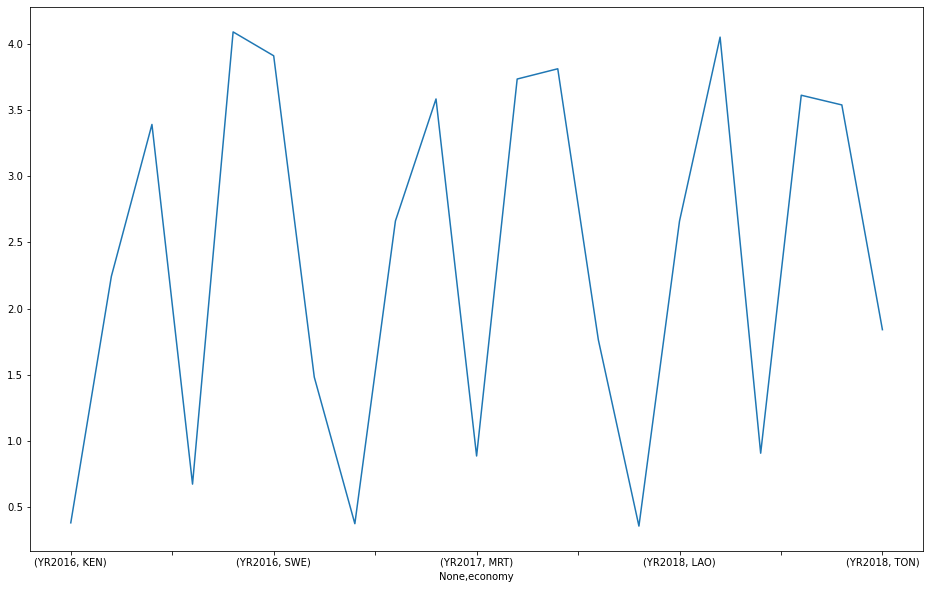

In [37]:
#looking at the carbon emission where urban pop is less than 20000000
plt.figure(figsize=(16, 10))
df_climate.loc[df_climate["SP.URB.TOTL"] < 20000000]['EN.ATM.CO2E.PC'].plot()

### From the Above two graphs it can be seen that where urban pop is less there is less CO2 emission 

In [38]:
df_gender

series          SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.MA.ZS  SL.EMP.WORK.FE.ZS  \
       economy                                                                  
YR2016 BGD                 93.535316             90.905350          27.980000   
       IDN                 99.653511             99.683449          41.900002   
       KEN                       NaN                   NaN          39.389999   
       LAO                       NaN                   NaN          15.890000   
       MNE                       NaN                   NaN          84.370003   
       MRT                       NaN                   NaN          24.190001   
       PER                 98.672203             99.088867          39.650002   
       SUR                       NaN                   NaN          89.150002   
       SWE                       NaN                   NaN          93.879997   
       TON                       NaN                   NaN          48.580002   
YR2017 BGD                 94.377762             91.541290          31.090000   
       IDN                       NaN                   NaN          41.650002   
       KEN                       NaN                   NaN          40.540001   
       LAO                       NaN                   NaN          16.830000   
       MNE                       NaN                   NaN          84.699997   
       MRT                 56.760719             70.936333          23.010000   
       PER                 98.853081             99.255981          39.480000   
       SUR                       NaN                   NaN          89.300003   
       SWE                       NaN                   NaN          94.220001   
       TON                       NaN                   NaN          49.529999   
YR2018 BGD                 94.912590             91.803719          32.610001   
       IDN                 99.696251             99.717484          40.869999   
       KEN                 88.080002             87.589996          41.660000   
       LAO                       NaN                   NaN          17.719999   
       MNE                 98.970001             99.230003          85.980003   
       MRT                       NaN                   NaN          23.110001   
       PER                 98.966972             99.079201          39.139999   
       SUR                 98.399963             98.875443          89.360001   
       SWE                       NaN                   NaN          94.400002   
       TON                 99.539780             99.348709          50.189999   
YR2019 BGD                 96.087761             93.704697          33.990002   
       IDN                       NaN                   NaN          41.040001   
       KEN                       NaN                   NaN          42.770000   
       LAO                       NaN                   NaN          18.500000   
       MNE                       NaN                   NaN          86.790001   
       MRT                       NaN                   NaN          23.530001   
       PER                       NaN                   NaN          38.689999   
       SUR                       NaN                   NaN          89.309998   
       SWE                       NaN                   NaN          94.330002   
       TON                       NaN                   NaN          50.779999   
YR2020 BGD                 95.858749             93.164169                NaN   
       IDN                 99.781448             99.777672                NaN   
       KEN                       NaN                   NaN                NaN   
       LAO                       NaN                   NaN                NaN   
       MNE                       NaN                   NaN                NaN   
       MRT                       NaN                   NaN                NaN   
       PER                 99.351486             99.517776                NaN   
       SUR                     

In [39]:
df_g = df_gender.unstack(level=1)

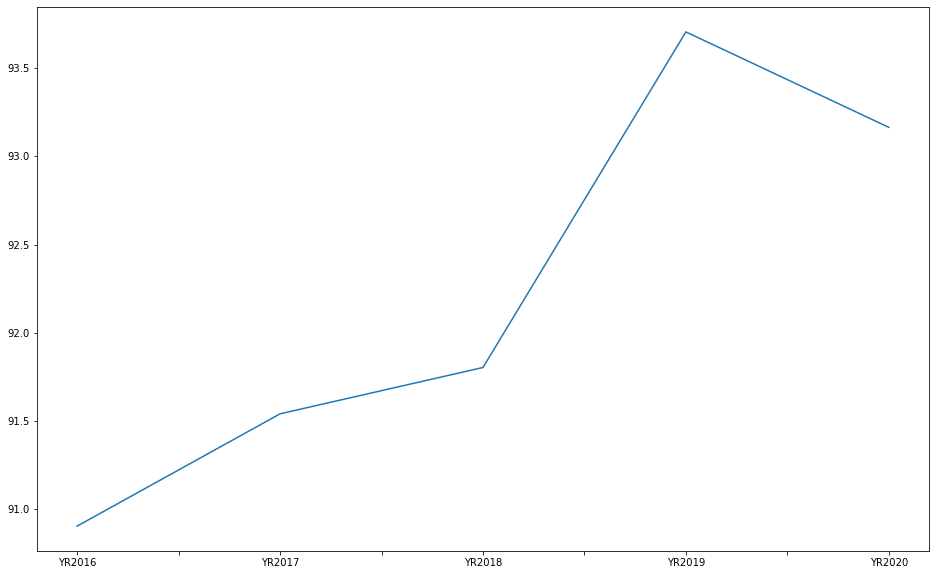

In [40]:
#looking at the literay rate for youth male between the ages of 15-24 in BGD country
plt.figure(figsize=(16, 10))
df_g['SE.ADT.1524.LT.MA.ZS','BGD'].plot()

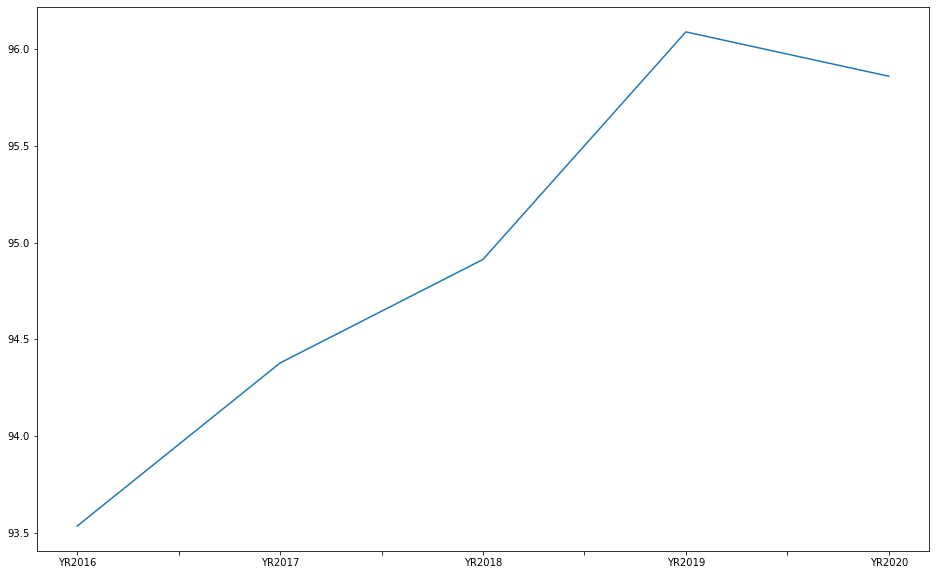

In [41]:
#looking at the literay rate for youth Female between the ages of 15-24 in BGD country
plt.figure(figsize=(16, 10))
df_g['SE.ADT.1524.LT.FE.ZS','BGD'].plot()

### From the Above two graps it can be seen that The literacy rate of females is a bit more than males in BGD over the past four years

## Data Analysis 

Use Pandas ``groupby()`` and ``pivot_table()`` methods to construct 8 different summary statistics. They must include the following Pandas techniques:

- ``groupby()`` combined with ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods.


- ``groupby()`` using an external key, the dictionary ``country_groups`` you have constructed above.


- at least one summary statistics must use the ``pivot_table()`` method. 


- at least two summary statistics must use data from both DataFrames.

The necessary Pandas techniques are explained in Notebooks 2.8 and 2.9.

**Important:** Make sure your summary statistics make sense and tell a story. This story must be summarized in the first part of this assignment, "The Story".


This part is worth 10 marks: 1 mark for Python code for each summary statistic and 2 marks for comments explaining the Python code and the summary statistics.

In [42]:
#function which takes a file name and returns two data frames
def function1(filename):
    #here i have used header =2 because of the csv file
    #also reading only the latest 5 yess in the file
    df = pd.read_csv(filename,header=2,usecols=([i for i in range(0,4)] + [i for i in range(59,65)]))
    #dataframe with year as columns
    df_year_col = df.set_index(['Country Name','Country Code','Indicator Name','Indicator Code'])
    #dataframe with country name as columns
    df_country_col = df.pivot(index='Indicator Name',columns='Country Name')
    return df_year_col,df_country_col

In [43]:
df3 = pd.read_csv('API_19_DS2_en_csv_v2_3931355.csv',header=2,usecols=([i for i in range(0,4)] + [i for i in range(59,65)]))
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000
1,Aruba,ABW,Urban population,SP.URB.TOTL,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631
3,Aruba,ABW,"Population, total",SP.POP.TOTL,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017


In [44]:
df3.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
2015              10158
2016              11067
2017              12149
2018              12771
2019              16498
2020              17217
dtype: int64

In [45]:
#drooping the nan values 
df3.dropna(inplace=True)

In [46]:
df3.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
dtype: int64

## Groupby()

In [47]:
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000
1,Aruba,ABW,Urban population,SP.URB.TOTL,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631
3,Aruba,ABW,"Population, total",SP.POP.TOTL,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017


In [48]:
#for the year 2015 calculating the min , mean and median for all the indicators
df3[['Country Name','2015']].groupby('Country Name').aggregate(['min', np.median, max])

2015                         
                                  min     median           max
Country Name                                                  
Afghanistan                  0.884001  15.727149  3.441360e+07
Africa Eastern and Southern  2.732598  22.698368  5.938718e+08
Africa Western and Central   2.056097  20.412168  4.015867e+08
Albania                     -0.291206  24.291339  2.880703e+06
Algeria                     -0.324012  18.389354  3.972802e+07
...                               ...        ...           ...
West Bank and Gaza           0.751036  19.200000  4.270092e+06
World                        1.181965  18.690103  7.347679e+09
Yemen, Rep.                  1.039832   9.415685  2.649788e+07
Zambia                       3.066671  27.840360  1.587937e+07
Zimbabwe                     1.296922  32.385000  1.381464e+07

[265 rows x 3 columns]

In [49]:
#To show trasformation using common example to center the data by subtracting the group-wise mean for the year 2015
df3[['Country Name','2015']].groupby('Country Name').transform(lambda x: x - x.mean())

,2015
0,-2.129516e+04
1,2.363973e+04
2,-2.133757e+04
3,8.300073e+04
4,-2.133773e+04
...,...
20152,-1.420423e+06
20159,-1.420415e+06
20202,-1.420423e+06
20206,-1.420380e+06


In [50]:
#filtering to show only the value whose std is greater than 4 for the year 2015
def filter_func(x):
    return x['2015'].std() > 4
df3[['Country Name','2015']].groupby('Country Name').filter(filter_func)

,Country Name,2015
0,Aruba,43.108000
1,Aruba,44978.000000
2,Aruba,0.696090
3,Aruba,104339.000000
4,Aruba,0.541048
...,...,...
20152,Zimbabwe,2.800000
20159,Zimbabwe,10.856040
20202,Zimbabwe,1.999687
20206,Zimbabwe,45.689363


In [51]:
# using applly functiuon to normalize the 2015 data by 2016 data
def norm_by_2016(x):
    x['2015'] /= x['2016'].sum()
    return x
df3[['Country Name','2015','2016']].groupby('Country Name').apply(norm_by_2016)

,Country Name,2015,2016
0,Aruba,2.869869e-04,43.192000
1,Aruba,2.994363e-01,45293.000000
2,Aruba,4.634142e-06,0.697901
3,Aruba,6.946258e-01,104865.000000
4,Aruba,3.601972e-06,0.502860
...,...,...,...
20152,Zimbabwe,1.494280e-07,2.800000
20159,Zimbabwe,5.793557e-07,10.725351
20202,Zimbabwe,1.067176e-07,1.669274
20206,Zimbabwe,2.438310e-06,45.570273


In [52]:
#grouping the datframe based on the external keys made earlier
df3.groupby(country_groups)

## pivottabel()

In [53]:
df3.set_index(['Country Name','Country Code','Indicator Name','Indicator Code'])

2015  \
Country Name Country Code Indicator Name                                     Indicator Code                        
Aruba        ABW          Urban population (% of total population)           SP.URB.TOTL.IN.ZS         43.108000   
                          Urban population                                   SP.URB.TOTL            44978.000000   
                          Urban population growth (annual %)                 SP.URB.GROW                0.696090   
                          Population, total                                  SP.POP.TOTL           104339.000000   
                          Population growth (annual %)                       SP.POP.GROW                0.541048   
...                                                                                                          ...   
Zimbabwe     ZWE          CPIA public sector management and institutions ... IQ.CPA.PUBS.XQ             2.800000   
                          Population in urban agglomerations of more than... EN.URB.MCTY.TL.ZS         10.856040   
                          Foreign direct investment, net inflows (% of GDP)  BX.KLT.DINV.WD.GD.ZS       1.999687   
                          Forest area (% of land area)                       AG.LND.FRST.ZS            45.689363   
                          Forest area (sq. km)                               AG.LND.FRST.K2        176749.300000   

                                                                                                            2016  \
Country Name Country Code Indicator Name                                     Indicator Code                        
Aruba        ABW          Urban population (% of total population)           SP.URB.TOTL.IN.ZS         43.192000   
                          Urban population                                   SP.URB.TOTL            45293.000000   
                          Urban population growth (annual %)                 SP.URB.GROW                0.697901   
                          Population, total                                  SP.POP.TOTL           104865.000000   
                          Population growth (annual %)                       SP.POP.GROW                0.502860   
...                                                                                                          ...   
Zimbabwe     ZWE          CPIA public sector management and institutions ... IQ.CPA.PUBS.XQ             2.800000   
                          Population in urban agglomerations of more than... EN.URB.MCTY.TL.ZS         10.725351   
                          Foreign direct investment, net inflows (% of GDP)  BX.KLT.DINV.WD.GD.ZS       1.669274   
                          Forest area (% of land area)                       AG.LND.FRST.ZS            45.570273   
                          Forest area (sq. km)                               AG.LND.FRST.K2        176288.600000   

                                                                                                            2017  \
Country Name Country Code Indicator Name                                     Indicator Code                        
Aruba        ABW          Urban population (% of total population)           SP.URB.TOTL.IN.ZS         43.293000   
                          Urban population                                   SP.URB.TOTL            45614.000000   
                          Urban population growth (annual %)                 SP.URB.GROW                0.706219   
                          Population, total                                  SP.POP.TOTL           105361.000000   
                          Population growth (annual %)                       SP.POP.GROW                0.471874   
...                                                                                                          ...   
Zimbabwe     ZWE          CPIA public sector management and institutions ... IQ.CPA.PUBS.XQ             2.800000   
                          Population in urban 

In [54]:
#the following table shows the summary of all the indicators for each country for the year 2020
df3.pivot_table(index='Indicator Name',columns='Country Name',values='2020')

Country Name,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry, and fishing, value added (% of GDP)",2.682060e+01,1.466570e+01,2.300483e+01,1.912196e+01,1.413479e+01,NaN,NaN,9.492693e+00,2.214198,5.586995e+00,...,2.510175e+01,NaN,NaN,1.485316e+01,NaN,NaN,4.345833e+00,5.000962e+00,2.977086e+00,7.607101e+00
CPIA public sector management and institutions cluster average (1=low to 6=high),2.600000e+00,2.768421e+00,3.050000e+00,NaN,NaN,NaN,NaN,NaN,NaN,2.433333e+00,...,3.400000e+00,3.200000,NaN,NaN,NaN,NaN,2.986301e+00,1.700000e+00,3.000000e+00,2.900000e+00
"Foreign direct investment, net inflows (% of GDP)",6.447633e-02,1.403911e+00,2.196867e+00,7.185462e+00,7.769918e-01,NaN,NaN,-3.197322e+00,5.365871,1.601804e+00,...,2.889221e+00,2.791741,NaN,5.826852e+00,NaN,3.364164e-01,1.410483e+00,NaN,-9.538752e-01,8.329654e-01
Forest area (% of land area),1.850994e+00,3.025179e+01,1.981676e+01,2.879197e+01,8.183090e-01,85.650000,34.042553,5.342695e+01,18.454545,2.812929e+00,...,8.375027e+00,36.283839,5.241302e+01,4.722511e+01,56.885714,1.684385e+00,NaN,1.039832e+00,6.028334e+01,4.509391e+01
Forest area (sq. km),1.208440e+04,4.479395e+06,1.792581e+06,7.889000e+03,1.949000e+04,171.300000,160.000000,6.660738e+05,81.200000,3.679807e+05,...,3.689660e+04,4423.000000,4.623090e+05,1.464309e+05,199.100000,1.014000e+02,NaN,5.490000e+03,4.481403e+05,1.744458e+05
"Mortality rate, under-5 (per 1,000 live births)",5.800000e+01,5.815865e+01,9.362702e+01,9.800000e+00,2.270000e+01,NaN,2.500000,7.150000e+01,6.400000,3.408640e+01,...,1.390000e+01,24.900000,2.420000e+01,2.090000e+01,NaN,1.650000e+01,3.660000e+01,5.960000e+01,6.140000e+01,5.390000e+01
Population growth (annual %),2.303812e+00,2.605427e+00,2.660902e+00,-5.779423e-01,1.836534e+00,-0.208128,0.154134,3.218530e+00,0.833667,1.918912e+00,...,1.922127e+00,2.394716,-2.805393e-01,9.045179e-01,-0.355937,2.486550e+00,1.018406e+00,2.251561e+00,2.885686e+00,1.473871e+00
Population in urban agglomerations of more than 1 million (% of total population),1.084437e+01,1.476120e+01,1.755565e+01,NaN,6.311506e+00,NaN,NaN,2.534452e+01,NaN,2.368336e+01,...,7.353872e+00,NaN,3.349552e+01,1.779718e+01,NaN,NaN,2.440588e+01,9.967784e+00,1.508997e+01,1.029353e+01
"Population, total",3.892834e+07,6.772433e+08,4.588035e+08,2.837743e+06,4.385104e+07,55197.000000,77265.000000,3.286627e+07,97928.000000,4.360807e+08,...,3.423205e+07,307150.000000,2.843594e+07,9.733858e+07,106290.000000,4.803269e+06,7.761620e+09,2.982597e+07,1.838396e+07,1.486293e+07


In [55]:
#the following table shows the summary of all the indicators for each country for the year 2019
df3.pivot_table(index='Country Name',columns='Indicator Name', values='2019')

Indicator Name,"Agriculture, forestry, and fishing, value added (% of GDP)",CPIA public sector management and institutions cluster average (1=low to 6=high),"Foreign direct investment, net inflows (% of GDP)",Forest area (% of land area),Forest area (sq. km),"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","School enrollment, primary and secondary (gross), gender parity index (GPI)",Urban population,Urban population (% of total population),Urban population growth (annual %)
Country Name,,,,,,,,,,,,,,,,
Afghanistan,25.773971,2.600000,0.124496,1.850994,12084.4,60.100000,2.313073,10.814511,3.804176e+07,NaN,NaN,NaN,NaN,9.797274e+06,25.754000,3.323827
Africa Eastern and Southern,12.502325,2.789474,1.458145,30.469798,4511676.2,60.054150,2.636666,14.623380,6.600463e+08,NaN,NaN,NaN,NaN,2.395395e+08,36.291322,4.022683
Africa Western and Central,21.257161,3.050000,2.150648,19.901215,1800220.1,96.494289,2.684152,17.416175,4.469116e+08,NaN,NaN,NaN,NaN,2.111338e+08,47.242853,4.026718
Albania,18.391244,NaN,7.798722,28.791971,7889.0,9.700000,-0.426007,NaN,2.854191e+06,NaN,NaN,103.322746,1.01863,1.747593e+06,61.229000,1.071414
Algeria,12.336212,NaN,0.804111,0.814110,19390.0,23.300000,1.933983,6.339446,4.305305e+07,NaN,NaN,101.364632,NaN,3.151010e+07,73.189000,2.702067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,0.769720,1.684385,101.4,17.000000,2.511782,NaN,4.685306e+06,NaN,NaN,96.322479,1.05812,3.581448e+06,76.440000,2.873518
World,4.010493,3.006667,1.696432,NaN,NaN,37.700000,1.064368,24.184512,7.683372e+09,NaN,12.864292,89.630142,NaN,4.280190e+09,55.720431,1.876032
"Yemen, Rep.",5.000962,1.700000,NaN,1.039832,5490.0,61.500000,2.300594,9.856597,2.916192e+07,NaN,NaN,NaN,NaN,1.086952e+07,37.273000,4.008005
